In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import CM4Xutils
CM4Xutils.__version__

'0.7.0'

In [3]:
import warnings
import dask
import xarray as xr
import xwmt
import matplotlib.pyplot as plt

import doralite
import gfdl_utils.core as gu

In [4]:
import sys
sys.path.insert(1, '../scipts')
from scripts.remap_functions import remap_budgets_to_sigma2_and_coarsen

## Load monthly water mass diagnostics on native grid

In [5]:
grid = CM4Xutils.load_wmt_grid(
    "CM4Xp125",
    interval=str(2345),
    dmget=True
)

Loading CM4Xp125-piControl-continued for interval `2345`.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Skipping variable average_DT because `cell_methods` attribute not defined.
Skipping variable average_T1 because `cell_methods` attribute not defined.
Skipping variable average_T2 because `cell_methods` attribute not defined.
Skipping variable time_bnds because `cell_methods` attribute not defined.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Overriding CM4Xp125 grid coordinates from supergrid.
Issuing dmget command to migrate data to disk. Migration complete.
Regridding ice
Skipping variable average_DT because `cell_methods` attribute not defined.
Skipping variable average_T1 because `cell_methods` attribute not defined.
Skipping variable avera

#### Confirmation that surface fluxes only result in convergence in the surface layer

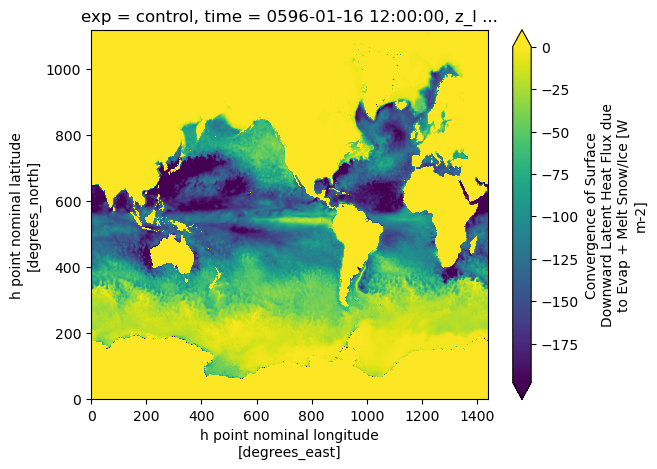

In [6]:
grid._ds["hflso"].isel(exp=0, time=0, z_l=0).plot(robust=True)

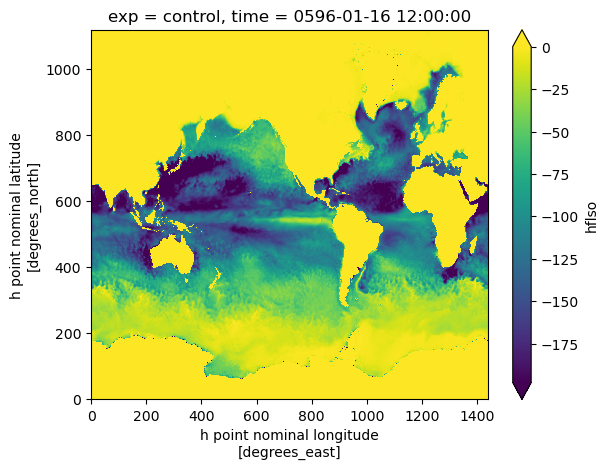

In [7]:
grid._ds["hflso"].isel(exp=0, time=0).sum("z_l").plot(robust=True)

## Density-bin and coarsen diagnostics

In [8]:
ds = remap_budgets_to_sigma2_and_coarsen("CM4Xp125", 2345)
display(ds)

Loading CM4Xp125-piControl-continued for interval `2345`.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Skipping variable average_DT because `cell_methods` attribute not defined.
Skipping variable average_T1 because `cell_methods` attribute not defined.
Skipping variable average_T2 because `cell_methods` attribute not defined.
Skipping variable time_bnds because `cell_methods` attribute not defined.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Overriding CM4Xp125 grid coordinates from supergrid.
Issuing dmget command to migrate data to disk. Migration complete.
Regridding ice
Skipping variable average_DT because `cell_methods` attribute not defined.
Skipping variable average_T1 because `cell_methods` attribute not defined.
Skipping variable avera

<xarray.Dataset> Size: 88GB
Dimensions:                         (exp: 1, time: 60, yh: 224, xh: 240,
                                     sigma2_l: 74, time_bounds: 61, xq: 241,
                                     yq: 225, sigma2_i: 75)
Coordinates: (12/28)
  * exp                             (exp) object 8B 'control'
  * time                            (time) object 480B 0596-01-16 12:00:00 .....
  * yh                              (yh) int64 2kB 0 1 2 3 4 ... 220 221 222 223
  * xh                              (xh) int64 2kB 0 1 2 3 4 ... 236 237 238 239
  * sigma2_l                        (sigma2_l) float64 592B 4.246 ... 38.49
  * time_bounds                     (time_bounds) object 488B 0596-01-01 00:0...
    ...                              ...
    dxCv                            (yq, xh) float64 432kB dask.array<chunksize=(225, 240), meta=np.ndarray>
    geolon_v                        (yq, xh) float64 432kB dask.array<chunksize=(225, 240), meta=np.ndarray>
    geolat_v                        (yq, xh) float64 432kB dask.array<chunksize=(225, 240), meta=np.ndarray>
    geolon_c                        (yq, xq) float64 434kB dask.array<chunksize=(225, 241), meta=np.ndarray>
    geolat_c                        (yq, xq) float64 434kB dask.array<chunksize=(225, 241), meta=np.ndarray>
    rho2_i                          (sigma2_i) float64 600B dask.array<chunksize=(75,), meta=np.ndarray>
Data variables: (12/54)
    thkcello                        (exp, time, sigma2_l, yh, xh) float64 2GB dask.array<chunksize=(1, 1, 74, 224, 240), meta=np.ndarray>
    thkcello_bounds                 (exp, time_bounds, sigma2_l, yh, xh) float64 2GB dask.array<chunksize=(1, 1, 74, 224, 240), meta=np.ndarray>
    boundary_forcing_heat_tendency  (exp, time, sigma2_l, yh, xh) float64 2GB dask.array<chunksize=(1, 1, 74, 224, 240), meta=np.ndarray>
    boundary_forcing_h_tendency     (exp, time, sigma2_l, yh, xh) float64 2GB dask.array<chunksize=(1, 1, 74, 224, 240), meta=np.ndarray>
    boundary_forcing_salt_tendency  (exp, time, sigma2_l, yh, xh) float64 2GB dask.array<chunksize=(1, 1, 74, 224, 240), meta=np.ndarray>
    dhdt                            (exp, time, sigma2_l, yh, xh) float64 2GB dask.array<chunksize=(1, 1, 74, 224, 240), meta=np.ndarray>
    ...                              ...
    ePBL_h_ML                       (exp, time, yh, xh) float64 26MB dask.array<chunksize=(1, 1, 224, 240), meta=np.ndarray>
    zos                             (exp, time, yh, xh) float64 26MB dask.array<chunksize=(1, 1, 224, 240), meta=np.ndarray>
    taux                            (exp, time, yh, xh) float64 26MB dask.array<chunksize=(1, 1, 224, 240), meta=np.ndarray>
    tauy                            (exp, time, yh, xh) float64 26MB dask.array<chunksize=(1, 1, 224, 240), meta=np.ndarray>
    siconc                          (exp, time, yh, xh) float64 26MB dask.array<chunksize=(1, 1, 224, 240), meta=np.ndarray>
    sithick                         (exp, time, yh, xh) float64 26MB dask.array<chunksize=(1, 1, 224, 240), meta=np.ndarray>
Attributes:
    filename:            ocean_monthly_z_d2.059601-060012.boundary_forcing_he...
    title:               CM4_piControl_c192_OM4p125_v8
    grid_type:           regular
    grid_tile:           N/A
    associated_files:    areacello: 05960101.D2ocean_static.nc
    history:             Sat Feb  8 10:30:13 2025: ncatted -O -a associated_f...
    NCO:                 netCDF Operators version 5.1.9 (Homepage = http://nc...
    external_variables:  volcello
    model:               CM4Xp125
    description:         The CM4Xp125 experimental design following Griffies ...
    provenance:          Diagnostics have been conservatively remapped into m...

#### Confirmation that ocean volume and layer thickness are preserved by horizontal coarsening and vertical transformation

**Note:** O(cm) errors expected because time averaging of `zos` and `thkcello` are slightly inconsistent.

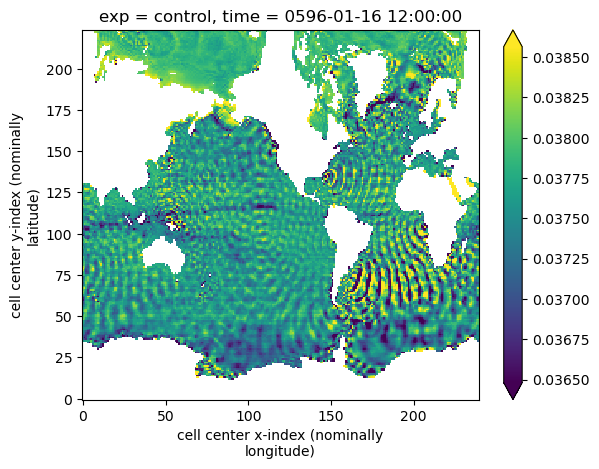

In [9]:
h_diff = ds['zos'] + ds['deptho']
h_sum = ds['thkcello'].sum("sigma2_l")
(h_diff - h_sum).isel(exp=0, time=0).plot(robust=True);

#### Confirmation that vertical heat transport still integrates to zero after horizontal coarsening and vertical transformation

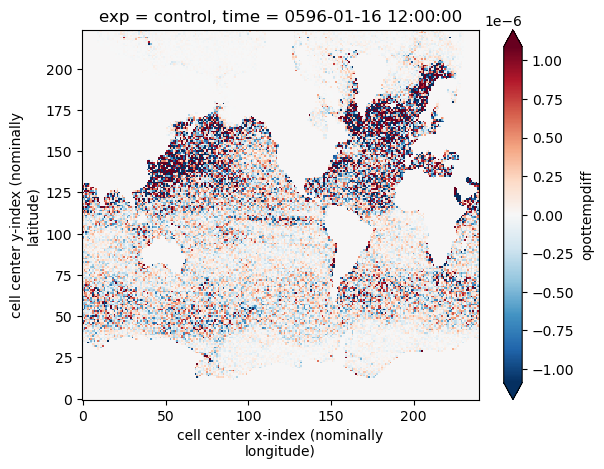

In [10]:
ds["opottempdiff"].isel(exp=0, time=0).sum("sigma2_l").plot(robust=True);

#### Confirmation that sea ice melt flux is correctly separated from liquid precipitation

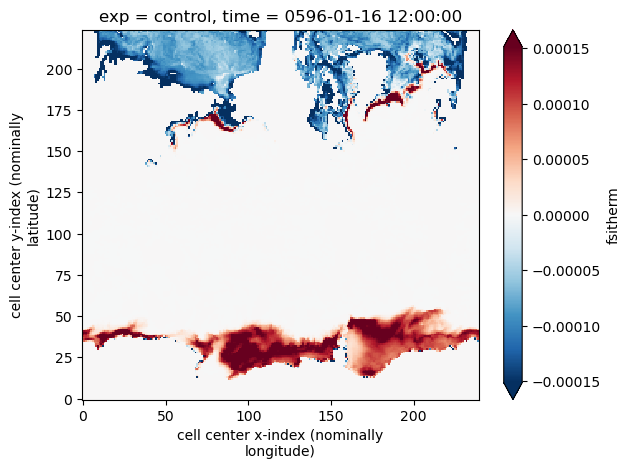

In [11]:
ds["fsitherm"].isel(exp=0, time=0).sum("sigma2_l").plot(robust=True)

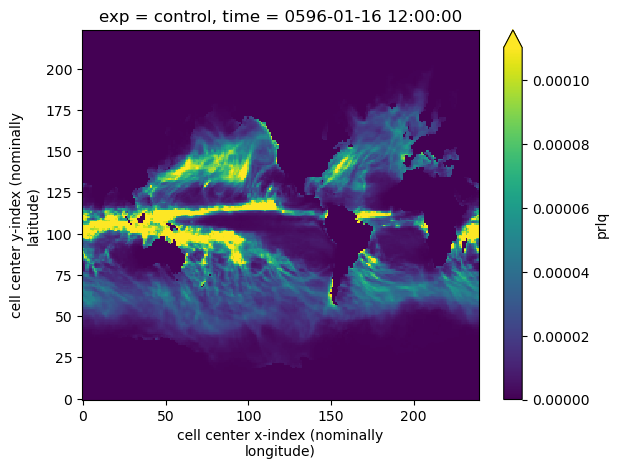

In [12]:
ds["prlq"].isel(exp=0, time=0).sum("sigma2_l").plot(robust=True)

#### Confirmation that shortwave absorption has been correctly derived from flux diagnostic

In [13]:
rsdoabsorb_example = ds["rsdoabsorb"].isel(exp=0, time=0).compute()

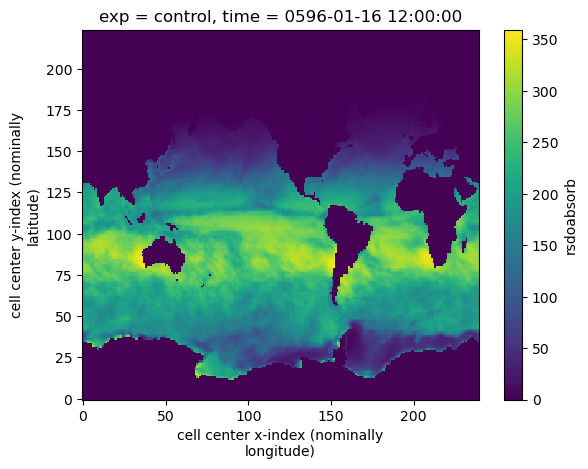

In [14]:
rsdoabsorb_example.sum("sigma2_l").plot()

#### Confirmation that flux convergences due to individual processes are consistent with the total heating of a density layer

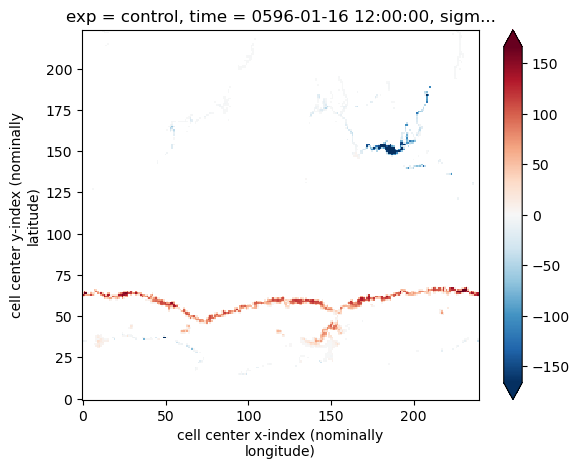

In [15]:
(ds["hflso"] + ds["hfsso"] + ds["rlntds"] + ds["rsdoabsorb"]).isel(exp=0, time=0).sel(sigma2_l=35.75, method="nearest").plot(robust=True)

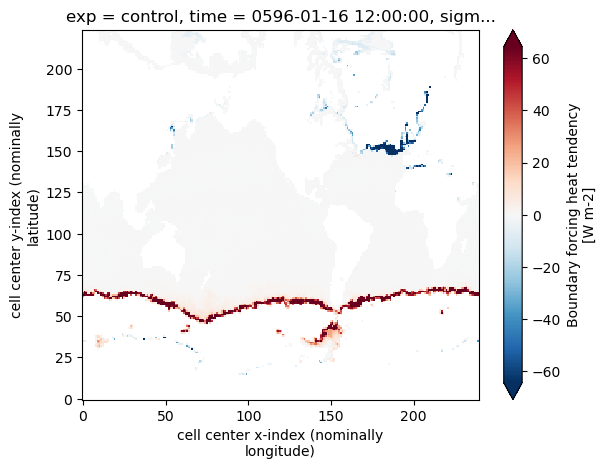

In [16]:
(ds["boundary_forcing_heat_tendency"]).isel(exp=0, time=0).sel(sigma2_l=35.75, method="nearest").plot(robust=True)

#### Confirmation that wind stress and SSH fields have been correctly coarsened

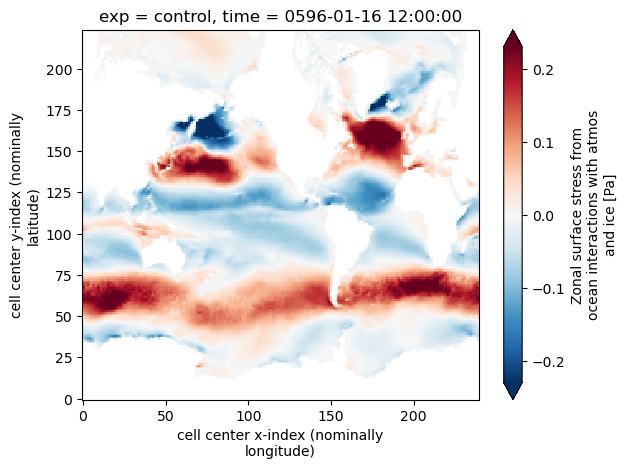

In [17]:
ds["taux"].isel(exp=0, time=0).plot(robust=True)

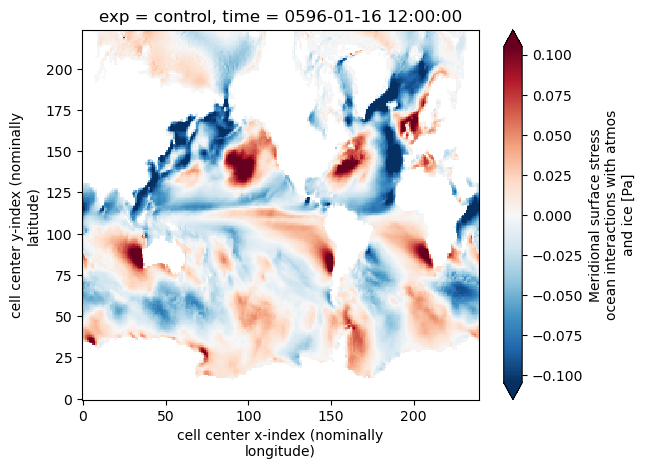

In [18]:
ds["tauy"].isel(exp=0, time=0).plot(robust=True)

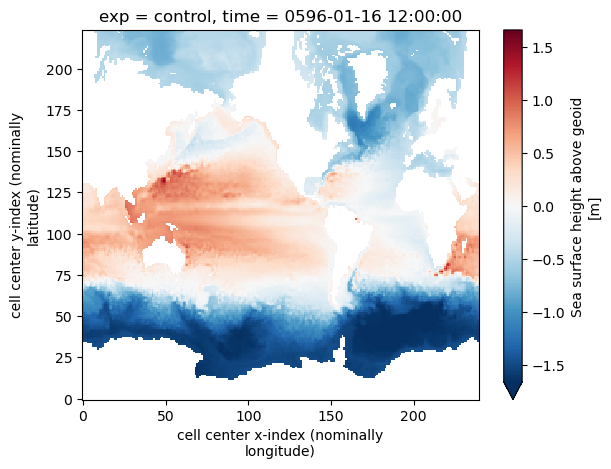

In [19]:
ds["zos"].isel(exp=0, time=0).plot(robust=True)